# Tests library module

In [80]:
import math
import pandas as pd
import numpy as np
from importlib import reload

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
rcParams['figure.figsize']= (10, 8)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

# 'style' the plot like fivethirtyeight.com website
style.use('bmh')


In [3]:
import library

In [117]:
reload(library)

<module 'library' from 'C:\\Users\\Alan\\Documents\\GitHub\\heat-pump-calc\\library.py'>

In [9]:
library.cities()[:5]

[('Adak', 2), ('Akhiok', 283), ('Akiachak', 84), ('Akiak', 85), ('Akutan', 3)]

In [10]:
library.city_from_id(1)

Name                                                         Anchorage
Latitude                                                         61.15
Longitude                                                      -149.86
FuelRefer                                                            0
FuelCityID                                                         NaN
Oil1Price                                                         3.07
Oil2Price                                                          NaN
PropanePrice                                                       4.5
BirchPrice                                                         325
SprucePrice                                                        345
CoalPrice                                                          175
SteamPrice                                                         NaN
HotWaterPrice                                                      NaN
MunicipalSalesTax                                                  NaN
Boroug

In [11]:
library.miscellaneous_info()

ID                                                                      1
LibVersion                                              2/27/2018 0:00:00
DiscountRate                                                         0.03
RegSurcharge                                                       0.0032
RegSurchargeElectric                                               0.0009
PCEkWhLimit                                                           500
PCEFundingPct                                                           1
MiscNotes               Inflation factors and discount rate from 2011 ...
Name: 0, dtype: object

In [12]:
library.util_from_id(1)

ID                                                              1
Name                                Chugach Electric- Residential
Active                                                          1
Type                                                            1
IsCommercial                                                    0
ChargesRCC                                                      1
PCE                                                             0
CO2                                                           1.1
CustomerChg                                                     8
DemandCharge                                                  NaN
NameShort                                                  Chugac
Blocks          [(nan, 0.17713), (nan, nan), (nan, nan), (nan,...
Name: 1, dtype: object

In [13]:
print(library.util_from_id(1).Blocks)
print(library.util_from_id(383).Blocks)

[(nan, 0.17713), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]
[(100.0, 0.8109000000000001), (400.0, 0.7409000000000001), (500.0, 0.6609), (1000.0, 0.5909), (nan, 0.5609000000000001)]


In [6]:
library.fuels()

[('Natural Gas', 1),
 ('Propane', 2),
 ('#1 Oil', 3),
 ('#2 Oil', 4),
 ('Birch Wood', 5),
 ('Spruce Wood', 6),
 ('Coal', 7),
 ('District Heat, Steam', 8),
 ('District Heat, Hot Water', 9)]

In [17]:
library.fuel_from_id(6)

desc         Spruce Wood
unit                cord
btus            1.81e+07
co2                    0
effic               0.63
price_col    SprucePrice
Name: 6, dtype: object

In [8]:
library.fuel_price(6, 1)

345.0

In [14]:
library.tmy_from_id(702190).head()

,db_temp,rh,wind_spd,month
2018-01-01 00:30:00,35.06,92,36.909510,1
2018-01-01 01:30:00,35.06,92,38.027980,1
2018-01-01 02:30:00,35.06,92,36.909510,1
2018-01-01 03:30:00,35.96,85,39.146450,1
2018-01-01 04:30:00,35.96,85,35.567346,1


In [68]:
import elec_cost
reload(elec_cost)

<module 'elec_cost' from 'C:\\Users\\Alan\\Documents\\GitHub\\heat-pump-calc\\elec_cost.py'>

In [62]:
util_id = 383
#util_id = 1
ec = elec_cost.ElecCostCalc(util_id)
print(ec.utility)
print(ec.utility.Blocks)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, sales_tax=1.)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=200)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=math.nan)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=0)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, blocks=[(400, 0.22), (math.nan, 0.18)], pce=0.1, pce_limit=200, sales_tax=0.1)
print(ec.final_blocks())

ID                                                            383
Name                  Gwitchyaa Zhee Utility Co - Commercial - Sm
Active                                                          1
Type                                                            1
IsCommercial                                                    1
ChargesRCC                                                      1
PCE                                                           NaN
CO2                                                             2
CustomerChg                                                     0
DemandCharge                                                  NaN
NameShort                                                  Gwitch
Blocks          [(100.0, 0.8109000000000001), (400.0, 0.740900...
Name: 383, dtype: object
[(100.0, 0.8109000000000001), (400.0, 0.7409000000000001), (500.0, 0.6609), (1000.0, 0.5909), (nan, 0.5609000000000001)]
[(100.0, 0.8109000000000001), (300.0, 0.7409000000000001), (10

In [54]:
util_id = 480  # ML&P Large Commercial
ec = elec_cost.ElecCostCalc(util_id)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1, demand_charge=10., customer_charge=5.)
print(ec.demand_charge, ec.customer_charge)

23.29 44.15
25.619 48.565000000000005
11.0 5.5


In [53]:
library.city_from_id(1).ElecUtilities

[('Anchorage ML&P - Residential', 2),
 ('Anchorage ML&P - Commercial - Sm', 293),
 ('Anchorage ML&P - Commercial - Lg', 480),
 ('Chugach Electric- Residential', 1),
 ('Chugach Electric - Commercial - Sm', 361),
 ('Chugach Electric - Commercial - Lg', 548)]

In [78]:
ec = elec_cost.ElecCostCalc(480, sales_tax=0.1, demand_charge=13.29, customer_charge=34.15)
ec.monthly_cost(700, 2)

129.096

In [74]:
print(ec.utility)
print(ec.utility.Blocks)

ID                                                            480
Name                             Anchorage ML&P - Commercial - Lg
Active                                                          1
Type                                                            1
IsCommercial                                                    1
ChargesRCC                                                      1
PCE                                                           NaN
CO2                                                           1.1
CustomerChg                                                 44.15
DemandCharge                                                23.29
NameShort                                                  Anchor
Blocks          [(nan, 0.0809), (nan, nan), (nan, nan), (nan, ...
Name: 480, dtype: object
[(nan, 0.0809), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]


Paxson Lodge, Inc - Commercial - Lg: $1.70/kWh
Paxson Lodge, Inc - Commercial - Sm: $1.70/kWh
Paxson Lodge, Inc - Residential: $1.70/kWh


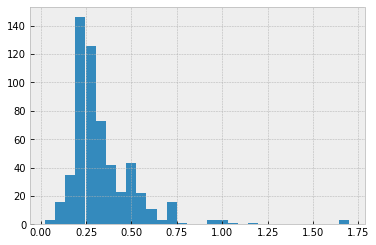

In [119]:
rates = []
for util_nm, util_id in library.utilities():
    ec = elec_cost.ElecCostCalc(util_id)
    if ec.utility.Type==2:
        continue
    rate = ec.monthly_cost(500., 1.7)/500.
    rates.append(rate)
    if rate > 1.2:
        print('{}: ${:.2f}/kWh'.format(util_nm, rate))
hist(rates, bins=30);

In [96]:
dfc = library.df_city.copy()
dfc['elec_count'] = [len(ut) for ut in dfc.ElecUtilities]
dfc.query('elec_count > 3')[['Name', 'ElecUtilities', 'elec_count']]

,Name,ElecUtilities,elec_count
ID,,,
1,Anchorage,"[(Anchorage ML&P - Residential, 2), (Anchorage...",6
11,Auke Bay,"[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
15,Delta Junction,"[(Golden Valley Electric - Residential, 3), (G...",5
19,Cantwell,"[(Golden Valley Electric - Residential, 3), (G...",5
32,Clear,"[(Golden Valley Electric - Residential, 3), (G...",5
182,Healy,"[(Golden Valley Electric - Residential, 3), (G...",5
200,"Juneau, Airport","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
202,Wrangell,"[(Wrangell, City of - Residential, 128), (Wran...",6
292,"Juneau, City of","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6


In [99]:
dfc.loc[301].ElecUtilities

[('AEL&P - Residential', 11),
 ('AEL&P - Residential Demand', 659),
 ('AEL&P - Residential Heat Pump', 663),
 ('AEL&P - Sm Commercial', 289),
 ('AEL&P - Lg Commercial', 476),
 ('AEL&P -  Sm Commercial Demand', 660)]

In [118]:
df_city = library.df_city
df_util = library.df_util
for ix, cty in df_city.iterrows():
    util_ids = [id for nm, id in cty.ElecUtilities]
    pces = df_util.loc[util_ids].PCE
    pce_vals = pces[pces > 0.0]
    pce_max = pces.max()
    if pce_max > 0:
        print(cty.Name, pces.values, pce_max, util_ids)

Adak [0.47 0.47] 0.47 [677, 678]
Akutan [0.77 0.77 0.77] 0.77 [9, 288, 475]
Allakaket [0.5 0.5 0.5] 0.5 [249, 291, 478]
Angoon [0.28 0.28 0.28] 0.28 [283, 393, 580]
Aniak [0.3 0.3 0.3] 0.3 [17, 295, 482]
Arctic Village [0.78 0.78 0.78] 0.78 [18, 296, 483]
Atka [0.23 0.23 0.23] 0.23 [16, 294, 481]
Bethel [0.11 0.11 0.11] 0.11 [23, 350, 537]
Bettles [0.36 0.36 0.36] 0.36 [250, 351, 538]
Central [0.31 0.31 0.31] 0.31 [33, 354, 541]
Chalkyitsik [0.33 0.33 0.33] 0.33 [277, 355, 542]
Chignik [0.24 0.24 0.24] 0.24 [31, 358, 545]
Chitina [0.33 0.33 0.33] 0.33 [32, 360, 547]
Circle [0.31 0.31 0.31] 0.31 [33, 354, 541]
Coffman Cove [0.03 0.03 0.03] 0.03 [252, 363, 550]
Cold Bay [0.45 0.45 0.45] 0.45 [47, 378, 565]
Cordova [0.08 0.08 0.08] 0.08 [37, 366, 553]
Atqasuk - Com [0.08 0.08 0.08] 0.08 [88, 427, 614]
Kaktovik - Res [0.08 0.08 0.08] 0.08 [88, 427, 614]
Nuiqsut [0.08  nan  nan] 0.08 [88, 673, 674]
Point Hope Res [0.08 0.08 0.08] 0.08 [88, 427, 614]
Point Lay [0.08 0.08 0.08] 0.08 [88, 427,